In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/CHIP_vars'

RB1060  
117875465	117875465	A	C	exonic	RAD21	nonsynonymous SNV  
117869732	117869732	T	C	intronic	RAD21	NA  
106197631	106197631	A	C	exonic	TET2	synonymous SNV  
31023741	31023741	A	T	exonic	ASXL1	nonsynonymous SNV  


RB1003  
25457243	25457243	G	A	exonic	DNMT3A	nonsynonymous SNV  
25462022	25462022	C	T	exonic	DNMT3A	stopgain  
25463541	25463541	G	C	exonic	DNMT3A	nonsynonymous SNV  
25464501	25464501	G	C	exonic	DNMT3A	nonsynonymous SNV  
43814926	43814926	T	A	intronic	MPL	NA  
119149239	119149239	G	C	exonic	CBL	nonsynonymous SNV  
148512211	148512211	T	C	intronic	EZH2	NA  


In [2]:
#config_f = "config.yaml"
outdir=""

frag_indir = "/home/isaac/lewis/mito_lineage/output/mtscATAC/data/CHIP_dec172021_b1/MTBlacklist_A2/"
samples = "Control,Flt3l,Input"
chip_genes = "TP53,U2AF1,SF3B1,SRSF2,TET2,IDH1,IDH2,DNMT3A"
is_chip_nameerror = False
cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv"
clones_meta_f = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'

In [3]:
# cells_meta_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/cells_meta.tsv" 
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/gff_hg38_1_2/mergedSamples/allSamples.integrated.rds" 
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones"

In [4]:
chip_genes = chip_genes.split(",")
samples = samples.split(",")

samples_dict = {ind+1: val for ind, val in enumerate(samples)}

In [5]:
if is_chip_nameerror:
    single_cell_dirs = {"Flt3l":"Control", "Control":"Flt3l", "Input":"Input"}
else:
    single_cell_dirs = {s:s for s in samples}


In [6]:
samples

['Control', 'Flt3l', 'Input']

In [7]:
import os
if outdir == "":
    outdir="./output"

if not os.path.exists(outdir):
    os.mkdir(outdir)

In [8]:
from src.utils.parse_config import read_config_file
from os.path import join, dirname
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mplh.cluster_help as ch
%load_ext autoreload
%autoreload 2

%matplotlib inline

fig_utils from mplh
here


## Load clone meta and cell IDs

In [9]:
dendro_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones/donor*dendro.csv"

dendro_fs = glob(dendro_indir)
clones_meta = []
for f in dendro_fs:
    clones_meta.append(pd.read_csv(f))

clones_meta = pd.concat(clones_meta, axis=0)

clones_meta.index = clones_meta["donor"].astype(str)+"_"+clones_meta["lineage"].astype(str)


#clones_meta = pd.read_csv(clones_meta_f, index_col=0)
#clones_meta

In [10]:
cells_meta = pd.read_csv(cells_meta_f, sep="\t", index_col=0)
cells_meta["name"] = cells_meta["donor"].astype(str) + "_" + cells_meta["lineage"].astype(str) + "_" + cells_meta["condition"]
cells_meta["ID"] = cells_meta["donor"].astype(str) + "_" + cells_meta["lineage"].astype(str) 
cells_meta["fold_change"] = cells_meta["ID"].map(clones_meta["fold_change"])

cells_meta


cells_meta["den_clust"] = cells_meta["ID"].map(clones_meta["den_clust"])


In [11]:
#config = read_config_file(config_f)
#chip_genes = config["chip_genes"]
#config


In [12]:
def peaks_gene(df, gene, anno):
    inds = anno[anno["gene"]==gene].index
    df = df.loc[df.index.isin(inds)]
    anno=anno.loc[anno.index.isin(inds)]
    return df, anno

In [13]:
def filt_cells(df, cells):
    df = df.loc[:, df.columns.isin(cells.index)]
    cells = cells.loc[df.columns]
    return df, cells

## Create peak matrix for each connditionn

Control
categorical True
categorical True
saving
categorical True
categorical True
saving


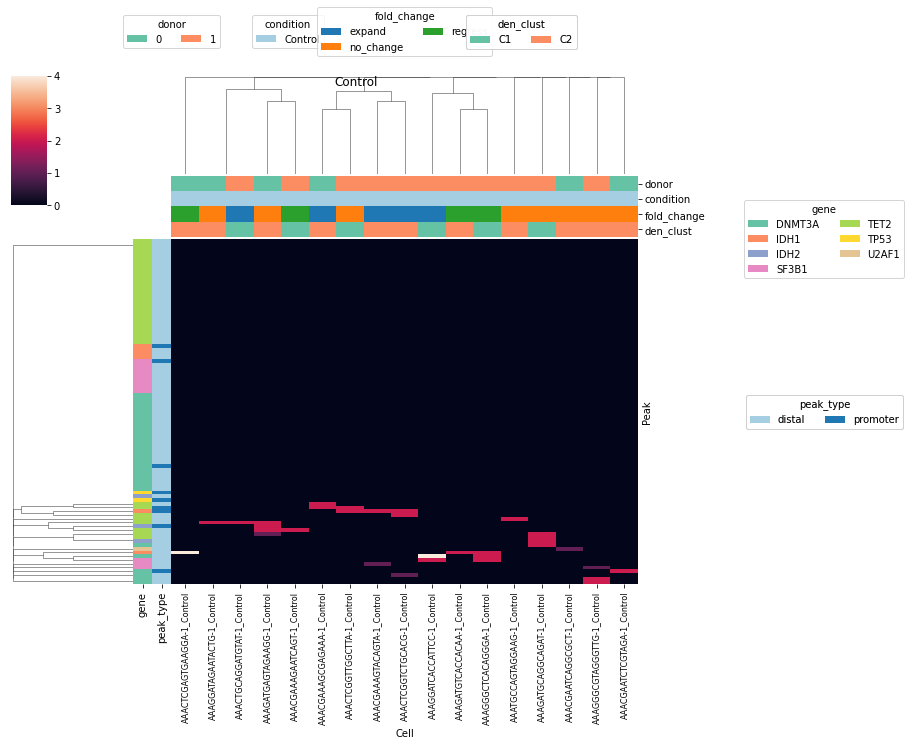

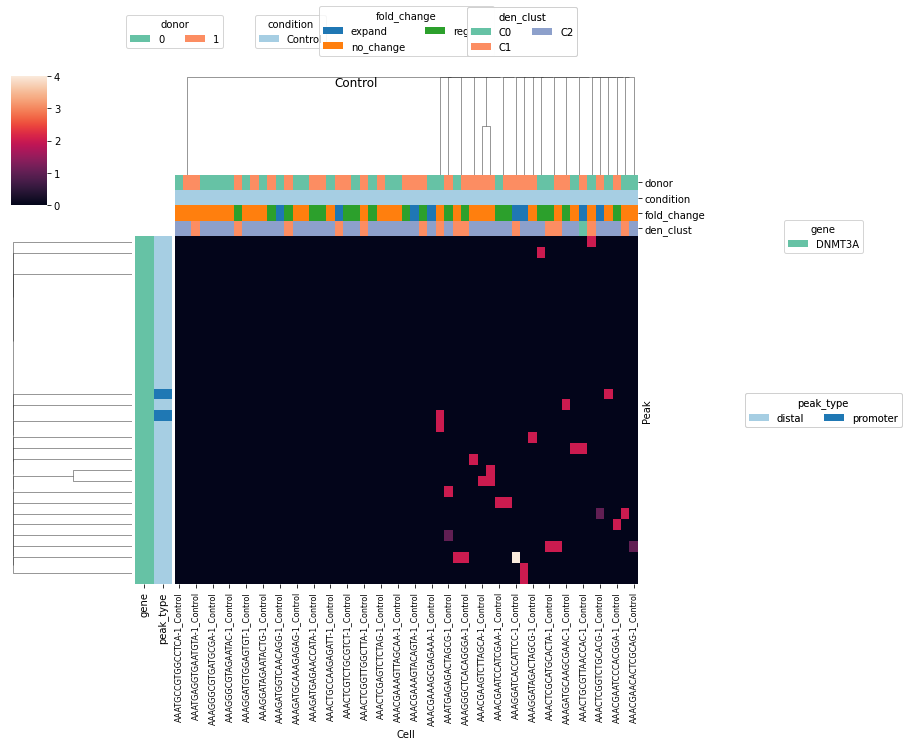

In [14]:
#curr_in = join(config["indir"], config['CBs'][0], 'outs')
for s in samples:
    print(s)
    curr_in = join(frag_indir, s, "outs")

    CBs = pd.read_csv(join(frag_indir, single_cell_dirs[s], "outs", "singlecell.csv"))
    CBs = CBs.loc[CBs["barcode"]!= "NO_BARCODE"].reset_index() ## drop the 'NO_BARCODE'
    CBs.index= CBs.index+1
    CBs["Condition ID"] = CBs["barcode"].apply(lambda x: x.split("-")[-1])
    CBs["Condition"] = CBs["Condition ID"].astype(int).map(samples_dict)
      
    cell_inds = pd.read_csv(join(curr_in, "filtered_peak_bc_matrix","barcodes.tsv"),header=None)
    ## Load peak annotations

    peak_annotations = pd.read_csv(join(curr_in,'peak_annotation.tsv'),sep='\t')
    peak_annotations.index=peak_annotations.index+1
    peak_annotations["gene"] = peak_annotations["gene"].str.upper()
    peak_annotations["Peak"]= peak_annotations.index
    # peak_annotations

    ## Filter for the chip genes 
    ## Uses peak_annotations
    # Load peaks matrix
    filename = join(curr_in,'filtered_peak_bc_matrix/matrix.mtx')
    peaks_sparse_mtx = pd.read_csv(filename,sep=' ',skiprows=3, header=None)
    peaks_sparse_mtx.columns = ["Peak", "Cell", "Count"]

    chip_anno = peak_annotations[peak_annotations["gene"].isin(chip_genes)].set_index("Peak", drop=True).copy()
    chip_anno.head()

    peaks_sparse_mtx = peaks_sparse_mtx.loc[peaks_sparse_mtx["Peak"].isin(chip_anno.index)]
    peaks_sparse_mtx["gene"] = peaks_sparse_mtx["Peak"].map(peak_annotations["gene"])
    CBs["barcode"] = CBs["barcode"] + "_" + s
    peaks_sparse_mtx["Cell"] = peaks_sparse_mtx["Cell"].map(CBs['barcode'])
    
    peaks_dense = peaks_sparse_mtx.pivot(index="Peak", columns="Cell",values="Count").fillna(0)
    CBs = CBs.set_index("barcode")
    chip_anno["ID"] = chip_anno.apply(lambda x: x["gene"]+"_"+x["peak_type"]+"_"+x["distance"],axis=1)
    chip_peaks_dense = peaks_dense.loc[peaks_dense.index.isin(chip_anno.index)].copy()    
    

    # Cluster cells by peaks 
    rand_df = chip_peaks_dense.sample(n=1000,axis=1)
    rand_df, curr_cells_meta = filt_cells(rand_df, cells_meta) #cells_meta.loc[cells_meta.index.isin(dnmt3.columns)]
    g = ch.plot_cluster(rand_df.fillna(0), row_meta=chip_anno.loc[rand_df.index,["gene", "peak_type"]], 
                    col_meta=curr_cells_meta[["donor", "condition", "fold_change", "den_clust"]].astype(str),
                    to_row_clust=True, 
                    metric='jaccard', to_legend=True, white_name=None, row_names=False )
    g.fig.suptitle(s)
    plt.savefig(join(outdir, f"sample_{s}_CHIP_genes_chromatinFragments.png"), bbox_inches='tight')

#     ## Countplots for each gene and peak type
#     f = plt.figure()
#     sns.countplot(chip_anno["gene"])
#     plt.title(s)
#     plt.savefig(join(outdir, f"sample_{s}_CHIP_genes_counts.png"), bbox_inches='tight')


    ## Filter for only ones with assigned clones
    # Runn for DNMT3A gene
    dnmt3, dnmt3_anno = peaks_gene(chip_peaks_dense, "DNMT3A", chip_anno)

    curr_dnmt3, curr_cells_meta = filt_cells(dnmt3, cells_meta) #cells_meta.loc[cells_meta.index.isin(dnmt3.columns)]
    g = ch.plot_cluster(curr_dnmt3.fillna(0), row_meta=dnmt3_anno[["gene", "peak_type"]], 
                        col_meta=curr_cells_meta[["donor", "condition", "fold_change", "den_clust"]].astype(str),
                        to_row_clust=True, sep_clr_map=True, to_col_clust=True,
                        metric='jaccard', to_legend=True, white_name=None, row_names=False )

    g.fig.suptitle(s)
    plt.savefig(join(outdir, f"sample_{s}_dnmt3a_chromatinFragments.png"), bbox_inches='tight')
    break

## Heatmap but by average (and median) of cells in clones

### Take average in each clone

In [21]:
def clone_mean(curr_clone, peaks_dense, method="mean"):
    if method == "mean":
        return peaks_dense.loc[:, peaks_dense.columns.isin(curr_clone.index)].mean(axis=1)
    elif method == "median":
        return peaks_dense.loc[:, peaks_dense.columns.isin(curr_clone.index)].median(axis=1)
    
def get_clone(name, meta):
    curr = meta.loc["_".join(name.split("_")[:2])]
    #print('curr', curr)
    curr.name=name
    curr.loc["condition"] = name.split("_")[2]
    return curr



### Create clone meta for each condition

In [25]:
clones_peaks_dense = curr_cells_meta.groupby("name").apply(clone_mean, dnmt3).fillna(0).transpose()
clones_peaks_dense.head()
    

name,0_0_Control,0_13_Control,0_14_Control,0_15_Control,0_18_Control,0_19_Control,0_21_Control,0_24_Control,0_25_Control,0_29_Control,...,1_20_Control,1_23_Control,1_25_Control,1_26_Control,1_27_Control,1_29_Control,1_3_Control,1_4_Control,1_6_Control,1_9_Control
Peak,,,,,,,,,,,,,,,,,,,,,
74374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74376,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:

# Convert the clone_condition to clone
curr_clone_meta = pd.DataFrame([get_clone(x, clones_meta) for x in clones_peaks_dense.columns])
curr_clone_meta.head()

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


,lineage,size,Control,Flt3l,Input,size_map,donor,hypergeom_sig_clusters_inputOnly,hypergeom_min_pval_inputOnly,ncells,...,input_dominant_cluster_size,hypergeom_sig_clusters,hypergeom_min_pval,shuffle_sig,-log10(fold p_adj),-log10(fold p_adj)_map,log2_fold_map,den_clust,den_clust_map,condition
0_0_Control,0,437,78.0,94.0,265.0,"[0.9060502442435664, 0.8870126653211716, 0.970...",0,NaN,NaN,419.0,...,90.0,2;3;12;13;14,7.995948e-08,True,12.121634,"[0.7876437101137418, 0.7679718905285481, 0.613...","(0.5683143439309744, 0.6958264787361839, 0.790...",C2,"(0.5529411764705883, 0.6274509803921569, 0.796...",Control
0_13_Control,13,269,40.0,37.0,192.0,"[0.7189075545439003, 0.6995550205247335, 0.882...",0,MPP/CMP/GMP B,0.002267,275.0,...,91.0,2;3;12,0.000000e+00,True,16.674035,"[0.8270344820692316, 0.815186416249202, 0.6804...","(0.3102360333260459, 0.5231362639042136, 0.680...",C2,"(0.5529411764705883, 0.6274509803921569, 0.796...",Control
0_14_Control,14,264,53.0,91.0,120.0,"[0.7015447518582452, 0.6837076850111431, 0.872...",0,NaN,NaN,271.0,...,44.0,3;12;13,1.209997e-02,False,0.398724,"[0.45328373991496973, 0.3693345509383195, 0.20...","(0.9263731379461269, 0.7650389543744571, 0.776...",C1,"(0.9882352941176471, 0.5529411764705883, 0.384...",Control
0_15_Control,15,248,65.0,124.0,59.0,"[0.6841097864784726, 0.6679718449112557, 0.861...",0,NaN,NaN,255.0,...,24.0,9,3.516714e-03,True,3.721318,"[0.72235575963484, 0.6875430600978242, 0.50976...","(0.9068152919027175, 0.6192539015920233, 0.640...",C2,"(0.5529411764705883, 0.6274509803921569, 0.796...",Control
0_18_Control,18,203,63.0,74.0,66.0,"[0.6314780878413411, 0.6213822957530565, 0.827...",0,NaN,NaN,211.0,...,29.0,0,6.970059e-02,False,0.077258,"[0.2996279712243867, 0.21984010425249093, 0.10...","(0.48228824039599827, 0.6382630737921938, 0.75...",C1,"(0.9882352941176471, 0.5529411764705883, 0.384...",Control


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


categorical True
categorical True
saving


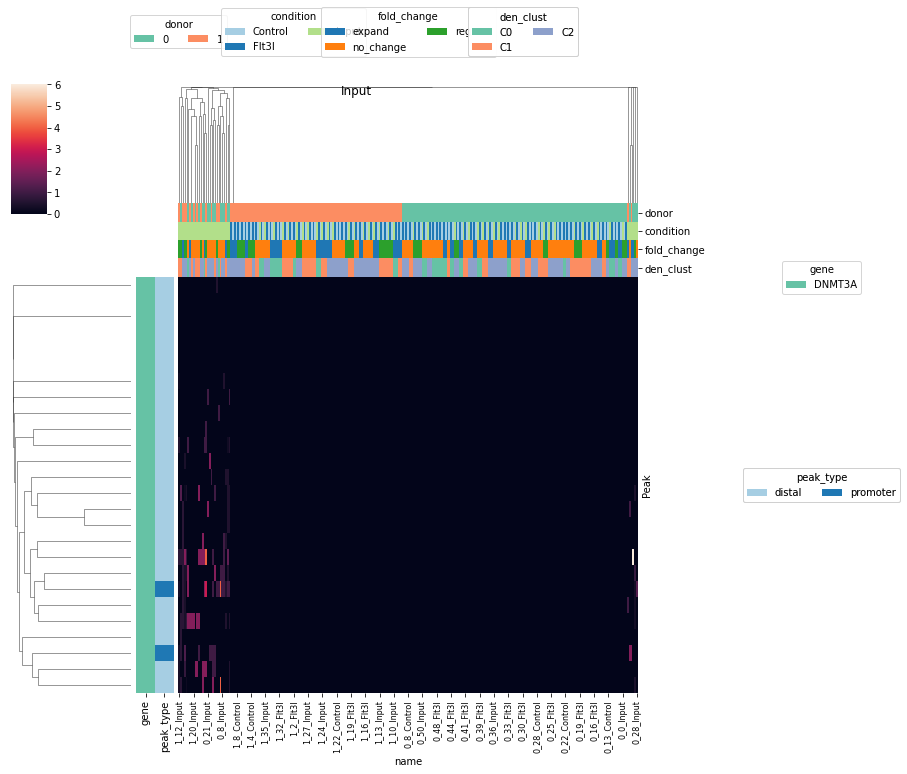

In [107]:
# inds = clone_dnmt3_anno[clone_dnmt3_anno["gene"]=="DNMT3A"].index
# inds
# clone_dnmt3 = clones_peaks_dense.loc[inds,:]
# clone_dnmt3_anno = chip_anno.loc[inds,:]

g = ch.plot_cluster(clones_peaks_dense.fillna(0), row_meta=dnmt3_anno[["gene", "peak_type"]], 
                    col_meta=curr_clone_meta[["donor", "condition", "fold_change", "den_clust"]].astype(str),
                    to_row_clust=True, sep_clr_map=True, to_col_clust=True,
                    metric='jaccard', to_legend=True, white_name=None, row_names=False )

g.fig.suptitle(s)
plt.savefig(join(outdir, f"sample_{s}_cloneMean_dnmt3a_chromatinFragments.png"), bbox_inches='tight')


## Remove low count clones


In [108]:
filt_clone_dnmt3 = clone_dnmt3.loc[~((clone_dnmt3 == 0).all())]
filt_peak_anno_dnmt3 = 
filt_clone_anno_dnmt3 = curr_clone_meta.loc[filt_clone_dnmt3.columns]
filt_clone_anno_dnmt3 = curr_clone_meta.loc[filt_clone_dnmt3.columns]

name
0_0_Control      True
0_0_Flt3l        True
0_0_Input        True
0_10_Control     True
0_10_Flt3l       True
                ...  
1_8_Flt3l        True
1_8_Input       False
1_9_Control      True
1_9_Flt3l        True
1_9_Input       False
Length: 257, dtype: bool